In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from PIL import Image

In [ ]:
path = "/content/drive/Shareddrives/Multicampus/Preprocessing/"
data_path2='/content/drive/Shareddrives/Multicampus/시각화/'

In [ ]:
data1=pd.read_csv(path+"pivot12_mnmx.csv")

In [ ]:
data1

SUBJECT_ID  50820_min  50868_min  ...  51275_max  51279_max  51301_max
0               2        NaN        NaN  ...        NaN       4.81       22.0
1               3       7.26       19.0  ...       58.3       3.30       24.4
2               4        NaN       15.0  ...       33.2       3.42        9.7
3               5        NaN        NaN  ...        NaN       3.96       13.9
4               6       7.25       23.0  ...      139.0       3.44       10.6
...           ...        ...        ...  ...        ...        ...        ...
33581       99983        NaN       11.0  ...       27.0       4.21        7.5
33582       99991        NaN        NaN  ...        NaN        NaN        NaN
33583       99992        NaN       15.0  ...        NaN       3.43       17.1
33584       99995       7.37        8.0  ...       35.5       2.86        8.2
33585       99999       7.36        NaN  ...        NaN        NaN        NaN

[33586 rows x 43 columns]

In [ ]:
data1.columns

Index(['SUBJECT_ID', '50820_min', '50868_min', '50882_min', '50893_min',
       '50902_min', '50912_min', '50931_min', '50960_min', '50970_min',
       '50971_min', '50983_min', '51006_min', '51200_min', '51221_min',
       '51222_min', '51254_min', '51256_min', '51265_min', '51275_min',
       '51279_min', '51301_min', '50820_max', '50868_max', '50882_max',
       '50893_max', '50902_max', '50912_max', '50931_max', '50960_max',
       '50970_max', '50971_max', '50983_max', '51006_max', '51200_max',
       '51221_max', '51222_max', '51254_max', '51256_max', '51265_max',
       '51275_max', '51279_max', '51301_max'],
      dtype='object')

In [ ]:
data2=pd.read_csv(path+"0413_mimic_prepro.csv")

In [ ]:
data2.columns

Index(['SUBJECT_ID', 'HADM_ID', 'AGE', 'staytime', 'new_code', 'blood',
       'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary',
       'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms',
       'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin', 'DEATHTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
       'INSURANCE', 'MARITAL_STATUS', 'RELIGION', 'ETHNICITY', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'GENDER'],
      dtype='object')

## 더미화 이전 파일 합치기(시각화시 더미화가 불편해서)


> 들여쓴 블록



In [ ]:
ds=pd.read_csv(path+"0414_dummy(최종).csv")

In [ ]:
data2=ds.merge(data2[['SUBJECT_ID','GENDER','RELIGION','MARITAL_STATUS','INSURANCE','DISCHARGE_LOCATION','ADMISSION_TYPE','ADMISSION_LOCATION','ETHNICITY']],on='SUBJECT_ID',how="inner")

In [ ]:
data2

SUBJECT_ID  AGE  ...         ADMISSION_LOCATION              ETHNICITY
0              22   64  ...       EMERGENCY ROOM ADMIT                  WHITE
1              24   39  ...  TRANSFER FROM HOSP/EXTRAM                  WHITE
2              25   58  ...       EMERGENCY ROOM ADMIT                  WHITE
3              26   72  ...  TRANSFER FROM HOSP/EXTRAM  UNKNOWN/NOT SPECIFIED
4              28   74  ...  PHYS REFERRAL/NORMAL DELI                  WHITE
...           ...  ...  ...                        ...                    ...
30919       98794   78  ...  PHYS REFERRAL/NORMAL DELI                  WHITE
30920       98797   88  ...       EMERGENCY ROOM ADMIT                  WHITE
30921       98800   19  ...  CLINIC REFERRAL/PREMATURE                  WHITE
30922       98802   83  ...  CLINIC REFERRAL/PREMATURE                  WHITE
30923       98805   42  ...  PHYS REFERRAL/NORMAL DELI                  WHITE

[30924 rows x 74 columns]

In [ ]:
data2.columns

Index(['SUBJECT_ID', 'AGE', 'staytime', 'new_code', 'blood', 'circulatory',
       'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious',
       'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous',
       'pregnancy', 'prenatal', 'respiratory', 'skin', 'HOSPITAL_EXPIRE_FLAG',
       'AGEG1', 'AGEG2', 'ADMTYPE_ELECTIVE', 'ADMTYPE_EMERGENCY',
       'ADMTYPE_URGENT', 'INS_Government', 'INS_Medicaid', 'INS_Medicare',
       'INS_Private', 'INS_Self Pay', 'MAR_DIVORCED', 'MAR_LIFE PARTNER',
       'MAR_MARRIED', 'MAR_SEPARATED', 'MAR_SINGLE', 'MAR_UNKNOWN (DEFAULT)',
       'MAR_WIDOWED', 'REL_7TH DAY ADVENTIST', 'REL_BAPTIST', 'REL_BUDDHIST',
       'REL_CATHOLIC', 'REL_CHRISTIAN SCIENTIST', 'REL_EPISCOPALIAN',
       'REL_GREEK ORTHODOX', 'REL_HEBREW', 'REL_HINDU',
       'REL_JEHOVAH'S WITNESS', 'REL_JEWISH', 'REL_LUTHERAN', 'REL_METHODIST',
       'REL_MUSLIM', 'REL_NOT SPECIFIED', 'REL_OTHER', 'REL_PROTESTANT QUAKER',
       'REL_ROMANIAN EAST. ORTH', 'REL_U

In [ ]:
data=data1.merge(data2,on="SUBJECT_ID",how="inner")

In [ ]:
data

SUBJECT_ID  50820_min  ...         ADMISSION_LOCATION              ETHNICITY
0               3       7.26  ...       EMERGENCY ROOM ADMIT                  WHITE
1               4        NaN  ...       EMERGENCY ROOM ADMIT                  WHITE
2               6       7.25  ...  PHYS REFERRAL/NORMAL DELI                  WHITE
3               9       7.39  ...       EMERGENCY ROOM ADMIT  UNKNOWN/NOT SPECIFIED
4              11        NaN  ...       EMERGENCY ROOM ADMIT                  WHITE
...           ...        ...  ...                        ...                    ...
27684       99983        NaN  ...  TRANSFER FROM HOSP/EXTRAM  UNKNOWN/NOT SPECIFIED
27685       99991        NaN  ...  PHYS REFERRAL/NORMAL DELI                  WHITE
27686       99992        NaN  ...  CLINIC REFERRAL/PREMATURE                  WHITE
27687       99995       7.37  ...  PHYS REFERRAL/NORMAL DELI                  WHITE
27688       99999       7.36  ...  PHYS REFERRAL/NORMAL DELI     HISPANIC OR LATINO

[27689 rows x 116 columns]

In [ ]:
data.to_csv(data_path2+"data1.csv")

In [ ]:
data["ETHNICITY"].unique()

array(['WHITE', 'UNKNOWN/NOT SPECIFIED', 'PATIENT DECLINED TO ANSWER',
       'BLACK/AFRICAN AMERICAN', 'ASIAN', 'HISPANIC OR LATINO', 'OTHER',
       'HISPANIC/LATINO - PUERTO RICAN', 'ASIAN - ASIAN INDIAN',
       'ASIAN - VIETNAMESE', 'HISPANIC/LATINO - DOMINICAN',
       'AMERICAN INDIAN/ALASKA NATIVE', 'WHITE - RUSSIAN',
       'UNABLE TO OBTAIN', 'WHITE - OTHER EUROPEAN', 'ASIAN - CHINESE',
       'MULTI RACE ETHNICITY', 'BLACK/CAPE VERDEAN', 'ASIAN - FILIPINO',
       'PORTUGUESE', 'CARIBBEAN ISLAND', 'SOUTH AMERICAN',
       'WHITE - EASTERN EUROPEAN', 'BLACK/HAITIAN',
       'HISPANIC/LATINO - SALVADORAN', 'WHITE - BRAZILIAN',
       'ASIAN - THAI', 'HISPANIC/LATINO - HONDURAN',
       'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'ASIAN - CAMBODIAN',
       'MIDDLE EASTERN', 'BLACK/AFRICAN', 'ASIAN - OTHER',
       'HISPANIC/LATINO - COLOMBIAN', 'HISPANIC/LATINO - GUATEMALAN',
       'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATI

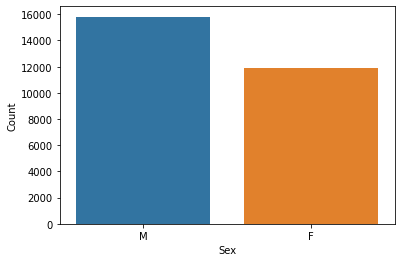

In [ ]:
plt.subplots()
sns.countplot(x=data["GENDER"])

plt.xlabel("Sex")
plt.ylabel("Count")

plt.savefig('Gender_num.png')

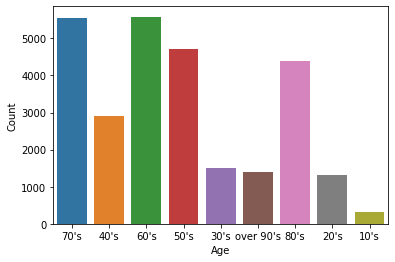

In [ ]:
#나이 그룹
plt.subplots()
sns.countplot(x="AGEG1", data=data)

plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig('age group.png')

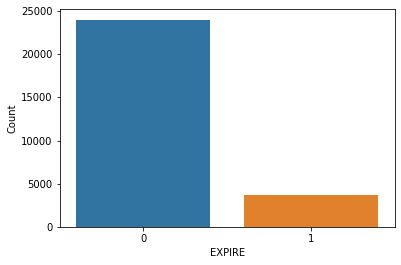

In [ ]:
plt.subplots()
sns.countplot(x="HOSPITAL_EXPIRE_FLAG", data=data)

plt.xlabel("EXPIRE")
plt.ylabel("Count")
plt.savefig('dead_live_num.png')

## 인종 columns추가

In [ ]:
for i in  range(len(data)):
     if data.iloc[i,-11]==1:
         data["ethnic"]='m'

In [ ]:
#인종
for i in range(len(data)):
    if data.iloc[i,-11]==1:
        data["ethnic"][i]="White"
    elif data.iloc[i,-12]==1:
        data["ethnic"][i]="Unknown "
    elif data.iloc[i,-13]==1:
        data["ethnic"][i]="Latino "
    elif data.iloc[i,-14]==1:
        data["ethnic"][i]="Black "
    elif data.iloc[i,-15]==1:
        data["ethnic"][i]="Asian"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying 

In [ ]:
del data['ETHNICITY']

In [ ]:
data.to_csv(data_path2+"data1.csv")

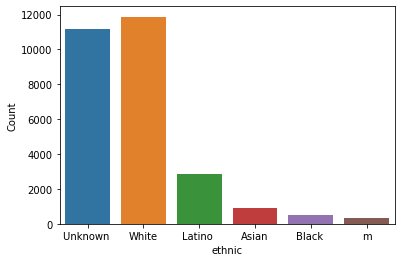

In [ ]:
##인종 시각화
plt.subplots()
sns.countplot(x="ethnic", data=data)
plt.xlabel("ethnic")
plt.ylabel("Count")
plt.savefig('ethnic_num')

In [ ]:
pi=pd.read_csv(path+"pivot12.csv")

In [ ]:
data.columns

Index(['SUBJECT_ID', '50820_min', '50868_min', '50882_min', '50893_min',
       '50902_min', '50912_min', '50931_min', '50960_min', '50970_min',
       ...
       'GEN_F', 'GEN_M', 'GENDER', 'RELIGION', 'MARITAL_STATUS', 'INSURANCE',
       'DISCHARGE_LOCATION', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'ethnic'],
      dtype='object', length=116)

Text(0, 0.5, 'Count')

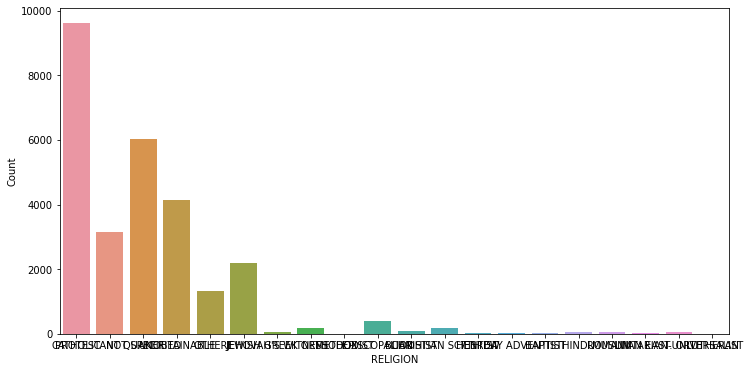

In [ ]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="RELIGION", data=data)
plt.xlabel("RELIGION")
plt.ylabel("Count")


# 2차자료

In [ ]:
diagnosis=data[['blood','circulatory','congenital','digestive','endocrine','genitourinary','infectious','injury','mental','misc','muscular','neoplasms','nervous','pregnancy','prenatal','respiratory','skin']]
diagnosis.head()

blood  circulatory  congenital  ...  prenatal  respiratory  skin
0      0            4           0  ...         0            0     1
1      0            0           0  ...         0            0     0
2      1            2           0  ...         0            0     0
3      0            3           0  ...         0            1     0
4      0            0           0  ...         0            0     0

[5 rows x 17 columns]

In [ ]:
diagnosis_sum=diagnosis.sum()
diagnosis_sum

blood            11813
circulatory      73117
congenital        1098
digestive        19278
endocrine        35760
genitourinary    15368
infectious        9286
injury           62479
mental           13549
misc             12382
muscular          6478
neoplasms         7506
nervous          11371
pregnancy          465
prenatal          3092
respiratory      22608
skin              3899
dtype: int64

In [ ]:
diagnosis_cnt=diagnosis[diagnosis.iloc[:,:]!=0].count()
diagnosis_cnt

blood             9170
circulatory      22670
congenital        1003
digestive        10536
endocrine        18872
genitourinary    10530
infectious        6803
injury           20362
mental            8845
misc              8848
muscular          4945
neoplasms         4609
nervous           7848
pregnancy          125
prenatal          2895
respiratory      13044
skin              2755
dtype: int64

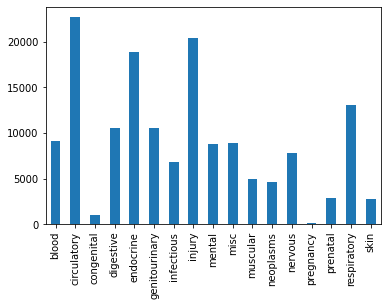

In [ ]:
diagnosis_cnt.plot(kind='bar')
plt.show()

In [ ]:
data.iloc[:,list(range(27))]

SUBJECT_ID  50820_min  50868_min  ...  50882_max  50893_max  50902_max
0               3       7.26       19.0  ...       13.0        7.4      111.0
1               4        NaN       15.0  ...       21.0        7.7      108.0
2               6       7.25       23.0  ...       15.0        8.6      105.0
3               9       7.39        NaN  ...        NaN        NaN        NaN
4              11        NaN       14.0  ...       25.0        NaN      106.0
...           ...        ...        ...  ...        ...        ...        ...
27684       99983        NaN       11.0  ...       28.0        9.4      104.0
27685       99991        NaN        NaN  ...        NaN        NaN        NaN
27686       99992        NaN       15.0  ...       22.0        7.3      104.0
27687       99995       7.37        8.0  ...       34.0        8.5      100.0
27688       99999       7.36        NaN  ...        NaN        NaN        NaN

[27689 rows x 27 columns]

In [ ]:
df=pd.read_csv(path+"pivot12.csv")

In [ ]:
df.columns

Index(['SUBJECT_ID', '50820', '50868', '50882', '50893', '50902', '50912',
       '50931', '50960', '50970', '50971', '50983', '51006', '51200', '51221',
       '51222', '51254', '51256', '51265', '51275', '51279', '51301'],
      dtype='object')

In [ ]:
df2=data.merge(df,how="inner",on="SUBJECT_ID")

In [ ]:
df2.columns

Index(['SUBJECT_ID', '50820_min', '50868_min', '50882_min', '50893_min',
       '50902_min', '50912_min', '50931_min', '50960_min', '50970_min',
       ...
       '51006', '51200', '51221', '51222', '51254', '51256', '51265', '51275',
       '51279', '51301'],
      dtype='object', length=137)

In [ ]:
df2.iloc[:,list(range(1,43))].columns

Index(['50820_min', '50868_min', '50882_min', '50893_min', '50902_min',
       '50912_min', '50931_min', '50960_min', '50970_min', '50971_min',
       '50983_min', '51006_min', '51200_min', '51221_min', '51222_min',
       '51254_min', '51256_min', '51265_min', '51275_min', '51279_min',
       '51301_min', '50820_max', '50868_max', '50882_max', '50893_max',
       '50902_max', '50912_max', '50931_max', '50960_max', '50970_max',
       '50971_max', '50983_max', '51006_max', '51200_max', '51221_max',
       '51222_max', '51254_max', '51256_max', '51265_max', '51275_max',
       '51279_max', '51301_max'],
      dtype='object')

In [ ]:
df2.drop(columns=['50820_min', '50868_min', '50882_min', '50893_min', '50902_min',
       '50912_min', '50931_min', '50960_min', '50970_min', '50971_min',
       '50983_min', '51006_min', '51200_min', '51221_min', '51222_min',
       '51254_min', '51256_min', '51265_min', '51275_min', '51279_min',
       '51301_min', '50820_max', '50868_max', '50882_max', '50893_max',
       '50902_max', '50912_max', '50931_max', '50960_max', '50970_max',
       '50971_max', '50983_max', '51006_max', '51200_max', '51221_max',
       '51222_max', '51254_max', '51256_max', '51265_max', '51275_max',
       '51279_max', '51301_max'],inplace=True)

In [ ]:
df2

SUBJECT_ID  AGE  staytime  ...       51275  51279      51301
0               3   76        11  ...   46.966667   2.93  18.266667
1               4   47         8  ...   33.200000   3.42   9.700000
2               6   65        17  ...  139.000000   3.44  10.600000
3               9   41         5  ...         NaN    NaN        NaN
4              11   50        26  ...         NaN   4.45   9.300000
...           ...  ...       ...  ...         ...    ...        ...
27684       99983   78         4  ...   27.000000   4.21   7.500000
27685       99991   47        13  ...         NaN    NaN        NaN
27686       99992   65         3  ...         NaN   3.43  17.100000
27687       99995   88         4  ...   31.700000   2.86   8.200000
27688       99999   64         6  ...         NaN    NaN        NaN

[27689 rows x 95 columns]

In [ ]:
item=df2[['50820', '50868', '50882', '50893', '50902', '50912',
       '50931', '50960', '50970', '50971', '50983', '51006', '51200', '51221',
       '51222', '51254', '51256', '51265', '51275', '51279', '51301']]

In [ ]:
item.corr()

50820     50868     50882  ...     51275     51279     51301
50820  1.000000 -0.296559  0.442124  ... -0.224153 -0.020944 -0.082201
50868 -0.296559  1.000000 -0.505819  ...  0.138499  0.070781  0.123745
50882  0.442124 -0.505819  1.000000  ... -0.142051  0.137480 -0.117850
50893  0.227718  0.054716  0.364374  ... -0.038107  0.275143 -0.067006
50902 -0.192039 -0.202068 -0.405738  ...  0.015475 -0.158719  0.016154
50912 -0.194531  0.452598 -0.185734  ...  0.071932 -0.103409  0.031590
50931 -0.154225  0.218912 -0.132264  ...  0.085581  0.027592  0.101397
50960  0.020968  0.071760  0.079804  ...  0.041345  0.026824  0.002103
50970 -0.379108  0.432106 -0.134103  ...  0.150489 -0.062544  0.054442
50971 -0.305177  0.224023 -0.124896  ...  0.047996 -0.002478  0.041416
50983 -0.037265 -0.030206  0.068733  ... -0.028624  0.026827 -0.015609
51006 -0.187572  0.402228 -0.200888  ...  0.071258 -0.171006  0.069257
51200  0.090762 -0.125691  0.128571  ...  0.003292 -0.024567 -0.117862
51221 -0.072887  0.095262  0.140259  ... -0.016353  0.862626  0.001469
51222 -0.012152  0.067254  0.132522  ... -0.035491  0.845777 -0.014222
51254  0.056251 -0.034812  0.040911  ... -0.003133 -0.039654 -0.071982
51256  0.117151  0.050857  0.000928  ... -0.041996  0.087609 -0.052826
51265  0.051812  0.060428  0.086912  ... -0.075028  0.133972  0.137760
51275 -0.224153  0.138499 -0.142051  ...  1.000000 -0.033636 -0.002722
51279 -0.020944  0.070781  0.137480  ... -0.033636  1.000000  0.011783
51301 -0.082201  0.123745 -0.117850  ... -0.002722  0.011783  1.000000

[21 rows x 21 columns]

In [ ]:
item.rename(columns={'50820':"pH", '50868':'Anion Gap', '50882':'Bicarbonate', '50893':'Calcium', '50902':'Chloride', '50912':'Creatinine',
       '50931':'Glucose', '50960':'Magnesium', '50970':'Phosphate', '50971':'Potassium', '50983':'Sodium', '51006':'Urea Nitrogen', '51200':'Eosinophils', '51221':'Hematocrit',
       '51222':'Hemoglobin', '51254':'Monocytes', '51256':'Neutrophils', '51265':'Platelet Count', '51275':'PTT', '51279':'RBC', '51301':'WBC'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
item

pH  Anion Gap  Bicarbonate  ...         PTT   RBC        WBC
0      7.340000  21.333333    12.333333  ...   46.966667  2.93  18.266667
1           NaN  15.000000    21.000000  ...   33.200000  3.42   9.700000
2      7.342000  23.000000    15.000000  ...  139.000000  3.44  10.600000
3      7.410000        NaN          NaN  ...         NaN   NaN        NaN
4           NaN  14.000000    25.000000  ...         NaN  4.45   9.300000
...         ...        ...          ...  ...         ...   ...        ...
27684       NaN  11.500000    27.500000  ...   27.000000  4.21   7.500000
27685       NaN        NaN          NaN  ...         NaN   NaN        NaN
27686       NaN  15.000000    22.000000  ...         NaN  3.43  17.100000
27687  7.471667   8.000000    34.000000  ...   31.700000  2.86   8.200000
27688  7.375000        NaN          NaN  ...         NaN   NaN        NaN

[27689 rows x 21 columns]

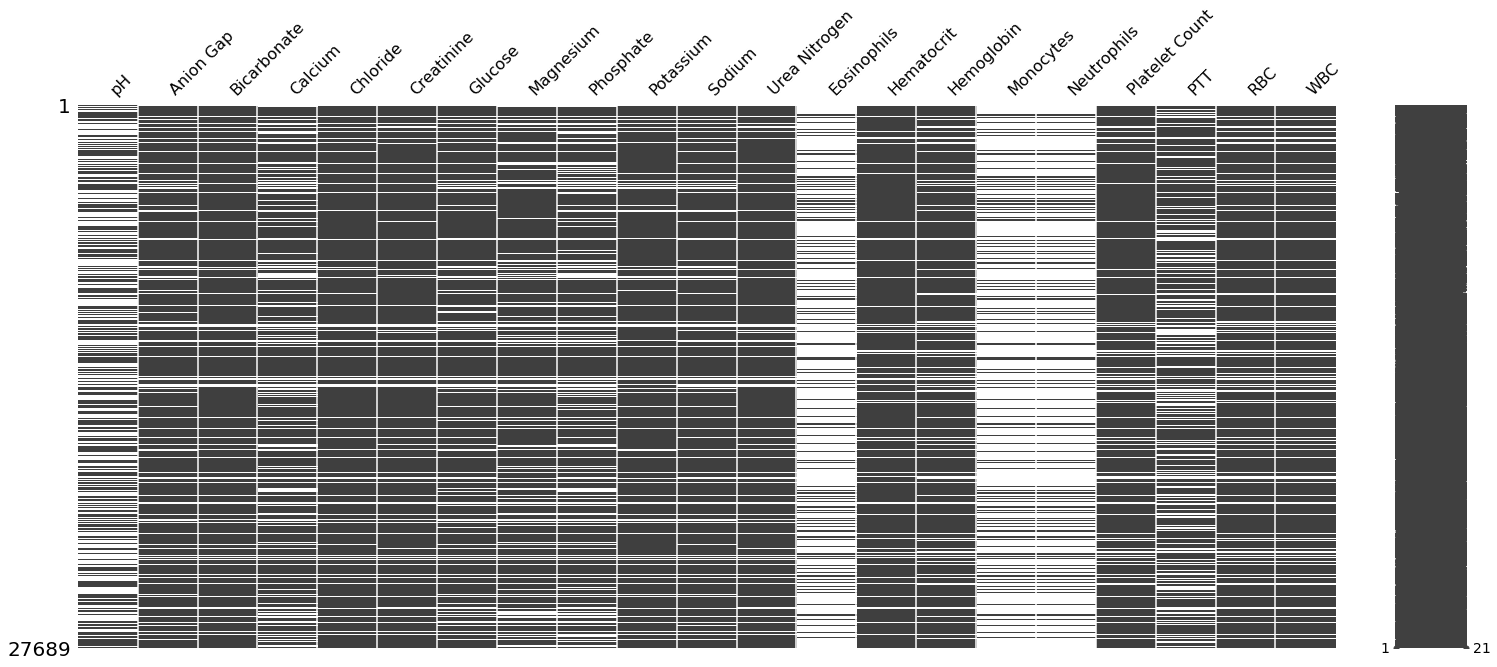

In [ ]:
# 결측값
import missingno as msno
%matplotlib inline
msno.matrix(item)
plt.savefig('null.png')

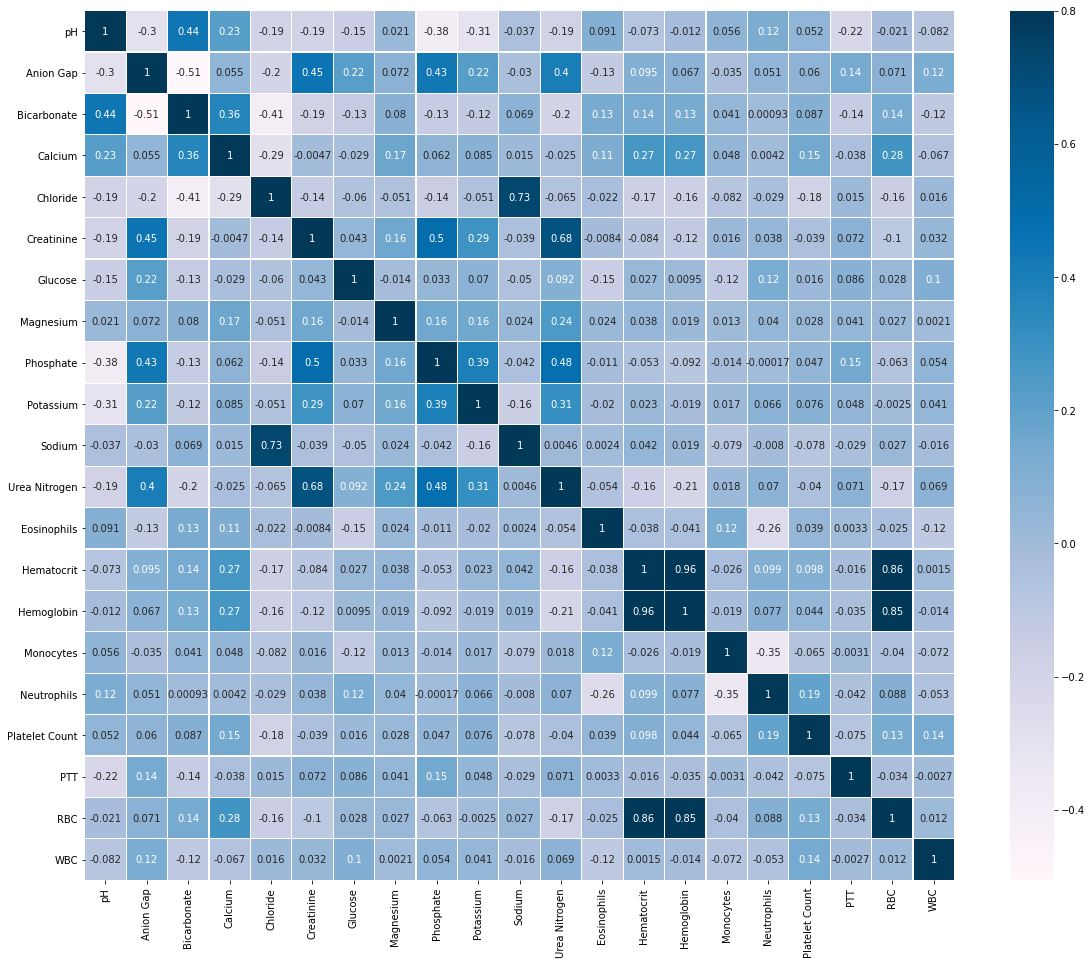

In [ ]:
#item ID간 상관계수 시각화
plt.subplots(figsize=(20,16))
sns.heatmap(item.corr(), linecolor="white",linewidths=0.2,square=True, #사각형 모양을 정사각형으로 출력
            annot=True,cmap=plt.cm.PuBu, vmax=0.8,annot_kws={"size":10})#annot_kws={"size":10} 칸 안에 글자 크기 10으로 설정
plt.savefig('item_corr.png')

In [ ]:
n=pd.read_csv(path+"unit_num_12hrs.csv")

In [ ]:
n

SUBJECT_ID  ITEMID  ...                24hrs  hours
0               24   50868  ...  2139-06-07 16:14:00   1.67
1               24   50868  ...  2139-06-07 16:14:00  10.77
2               25   50868  ...  2160-11-03 02:06:00   1.88
3               25   50868  ...  2160-11-03 02:06:00   4.83
4               25   50868  ...  2160-11-03 02:06:00   6.82
...            ...     ...  ...                  ...    ...
649654       98797   50820  ...  2132-12-25 20:06:00   3.65
649655       98800   50820  ...  2131-03-31 21:13:00   3.45
649656       98805   50820  ...  2200-09-13 07:15:00   2.65
649657       98805   50820  ...  2200-09-13 07:15:00   7.42
649658       98805   50820  ...  2200-09-13 07:15:00  10.95

[649659 rows x 9 columns]

In [ ]:
n[n["SUBJECT_ID"]==3]

SUBJECT_ID  ITEMID  ...                24hrs  hours
83               3   50868  ...  2101-10-21 19:08:00   0.85
84               3   50868  ...  2101-10-21 19:08:00   0.30
85               3   50868  ...  2101-10-21 19:08:00   7.87
31296            3   50882  ...  2101-10-21 19:08:00   0.85
31297            3   50882  ...  2101-10-21 19:08:00   0.30
...            ...     ...  ...                  ...    ...
600694           3   50820  ...  2101-10-21 19:08:00   5.57
600695           3   50820  ...  2101-10-21 19:08:00   6.63
600696           3   50820  ...  2101-10-21 19:08:00   0.07
600697           3   50820  ...  2101-10-21 19:08:00   0.10
600698           3   50820  ...  2101-10-21 19:08:00   8.02

[61 rows x 9 columns]

In [ ]:
n.pivot_table('LABEL',"SUBJECT_ID",aggfunc="count")

LABEL
SUBJECT_ID       
2              16
3              61
4              20
5               8
6              25
...           ...
99983          29
99991           3
99992          16
99995          24
99999           2

[33587 rows x 1 columns]

In [ ]:
p=pd.read_csv(path+"unit_num_24hrs.csv")

In [ ]:
p[p["SUBJECT_ID"]==3]

SUBJECT_ID  ITEMID  ...            ADMITTIME                24hrs
137              3   50868  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
138              3   50868  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
139              3   50868  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
140              3   50868  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
53247            3   50882  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
...            ...     ...  ...                  ...                  ...
964502           3   50820  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
964503           3   50820  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
964504           3   50820  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
964505           3   50820  ...  2101-10-20 19:08:00  2101-10-21 19:08:00
964506           3   50820  ...  2101-10-20 19:08:00  2101-10-21 19:08:00

[82 rows x 8 columns]

In [ ]:
p.pivot_table('LABEL',"SUBJECT_ID",aggfunc="count")

LABEL
SUBJECT_ID       
2              16
3              82
4              20
5               8
6              46
...           ...
99983          45
99991          19
99992          18
99995          42
99999           7

[36439 rows x 1 columns]

In [ ]:
p

SUBJECT_ID  ITEMID  ...            ADMITTIME                24hrs
0                22   50868  ...  2196-04-09 12:26:00  2196-04-10 12:26:00
1                24   50868  ...  2139-06-06 16:14:00  2139-06-07 16:14:00
2                24   50868  ...  2139-06-06 16:14:00  2139-06-07 16:14:00
3                25   50868  ...  2160-11-02 02:06:00  2160-11-03 02:06:00
4                25   50868  ...  2160-11-02 02:06:00  2160-11-03 02:06:00
...             ...     ...  ...                  ...                  ...
1043195       98805   50820  ...  2200-09-12 07:15:00  2200-09-13 07:15:00
1043196       98805   50820  ...  2200-09-12 07:15:00  2200-09-13 07:15:00
1043197       98805   50820  ...  2200-09-12 07:15:00  2200-09-13 07:15:00
1043198       98805   50820  ...  2200-09-12 07:15:00  2200-09-13 07:15:00
1043199       98805   50820  ...  2200-09-12 07:15:00  2200-09-13 07:15:00

[1043200 rows x 8 columns]

In [ ]:
diag_dict = {0: 'infectious', 1: 'neoplasms', 2: 'endocrine', 3: 'blood',
             4: 'mental', 5: 'nervous', 6: 'circulatory', 7: 'respiratory',
             8: 'digestive', 9: 'genitourinary', 10: 'pregnancy', 11: 'skin', 
             12: 'muscular', 13: 'congenital', 14: 'prenatal', 15: 'misc',
             16: 'injury'}

In [ ]:
pd.read_csv(path+"icd9_prepro.csv")

SUBJECT_ID  ... skin
0               2  ...    0
1               3  ...    1
2               4  ...    0
3               5  ...    0
4               6  ...    0
...           ...  ...  ...
38978       99985  ...    0
38979       99991  ...    0
38980       99992  ...    0
38981       99995  ...    0
38982       99999  ...    0

[38983 rows x 19 columns]

In [ ]:
df2

SUBJECT_ID  AGE  staytime  ...       51275  51279      51301
0               3   76        11  ...   46.966667   2.93  18.266667
1               4   47         8  ...   33.200000   3.42   9.700000
2               6   65        17  ...  139.000000   3.44  10.600000
3               9   41         5  ...         NaN    NaN        NaN
4              11   50        26  ...         NaN   4.45   9.300000
...           ...  ...       ...  ...         ...    ...        ...
27684       99983   78         4  ...   27.000000   4.21   7.500000
27685       99991   47        13  ...         NaN    NaN        NaN
27686       99992   65         3  ...         NaN   3.43  17.100000
27687       99995   88         4  ...   31.700000   2.86   8.200000
27688       99999   64         6  ...         NaN    NaN        NaN

[27689 rows x 95 columns]

In [ ]:
df2.groupby('HOSPITAL_EXPIRE_FLAG').get_group(1)

SUBJECT_ID  AGE  staytime  ...  51275  51279  51301
3               9   41         5  ...    NaN    NaN    NaN
5              12   72        13  ...  51.60   3.65   12.9
14             31   72         8  ...    NaN    NaN    NaN
28             56   90         7  ...  27.00   3.52    8.9
42             91   81        18  ...    NaN   4.28   10.7
...           ...  ...       ...  ...    ...    ...    ...
27648       99817   70        37  ...  44.70   2.77    9.6
27658       99865   77        20  ...  42.40   4.16    3.5
27663       99881   77         3  ...  32.55   2.72   16.7
27666       99899   87        10  ...    NaN    NaN    NaN
27679       99955   63         6  ...    NaN   5.01   13.4

[3682 rows x 95 columns]

In [ ]:
item['Anion Gap'].value_counts()

13.000000    2845
14.000000    2723
12.000000    2326
15.000000    2314
11.000000    1821
             ... 
10.800000       1
5.666667        1
13.800000       1
16.800000       1
29.750000       1
Name: Anion Gap, Length: 181, dtype: int64

퇴원자들이 검사한 수치들 변화

사망자들의 검사한 수치들의 변화

알아봐야할거 생존자들 퇴원 직전 검사 수치 평균

사망자들 사망직전 수치 평균 

In [ ]:
item

pH  Anion Gap  Bicarbonate  ...         PTT   RBC        WBC
0      7.340000  21.333333    12.333333  ...   46.966667  2.93  18.266667
1           NaN  15.000000    21.000000  ...   33.200000  3.42   9.700000
2      7.342000  23.000000    15.000000  ...  139.000000  3.44  10.600000
3      7.410000        NaN          NaN  ...         NaN   NaN        NaN
4           NaN  14.000000    25.000000  ...         NaN  4.45   9.300000
...         ...        ...          ...  ...         ...   ...        ...
27684       NaN  11.500000    27.500000  ...   27.000000  4.21   7.500000
27685       NaN        NaN          NaN  ...         NaN   NaN        NaN
27686       NaN  15.000000    22.000000  ...         NaN  3.43  17.100000
27687  7.471667   8.000000    34.000000  ...   31.700000  2.86   8.200000
27688  7.375000        NaN          NaN  ...         NaN   NaN        NaN

[27689 rows x 21 columns]

In [ ]:
item["dead"]=df2["HOSPITAL_EXPIRE_FLAG"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dead_item=item.pivot_table(columns="dead",aggfunc="count").reset_index()
dead_item

dead           index      0     1
0          Anion Gap  19593  3330
1        Bicarbonate  20824  3351
2            Calcium  16725  3103
3           Chloride  20970  3361
4         Creatinine  21119  3354
5        Eosinophils   5041  1203
6            Glucose  19204  3325
7         Hematocrit  21746  3346
8         Hemoglobin  20185  3231
9          Magnesium  18470  3209
10         Monocytes   5041  1203
11       Neutrophils   5041  1203
12               PTT  16923  2826
13         Phosphate  16529  3117
14    Platelet Count  20942  3258
15         Potassium  20625  3387
16               RBC  20130  3227
17            Sodium  19883  3363
18     Urea Nitrogen  21084  3350
19               WBC  20200  3243
20                pH  10585  2297

# 퇴원,사망자들의 검사 검사 갯수

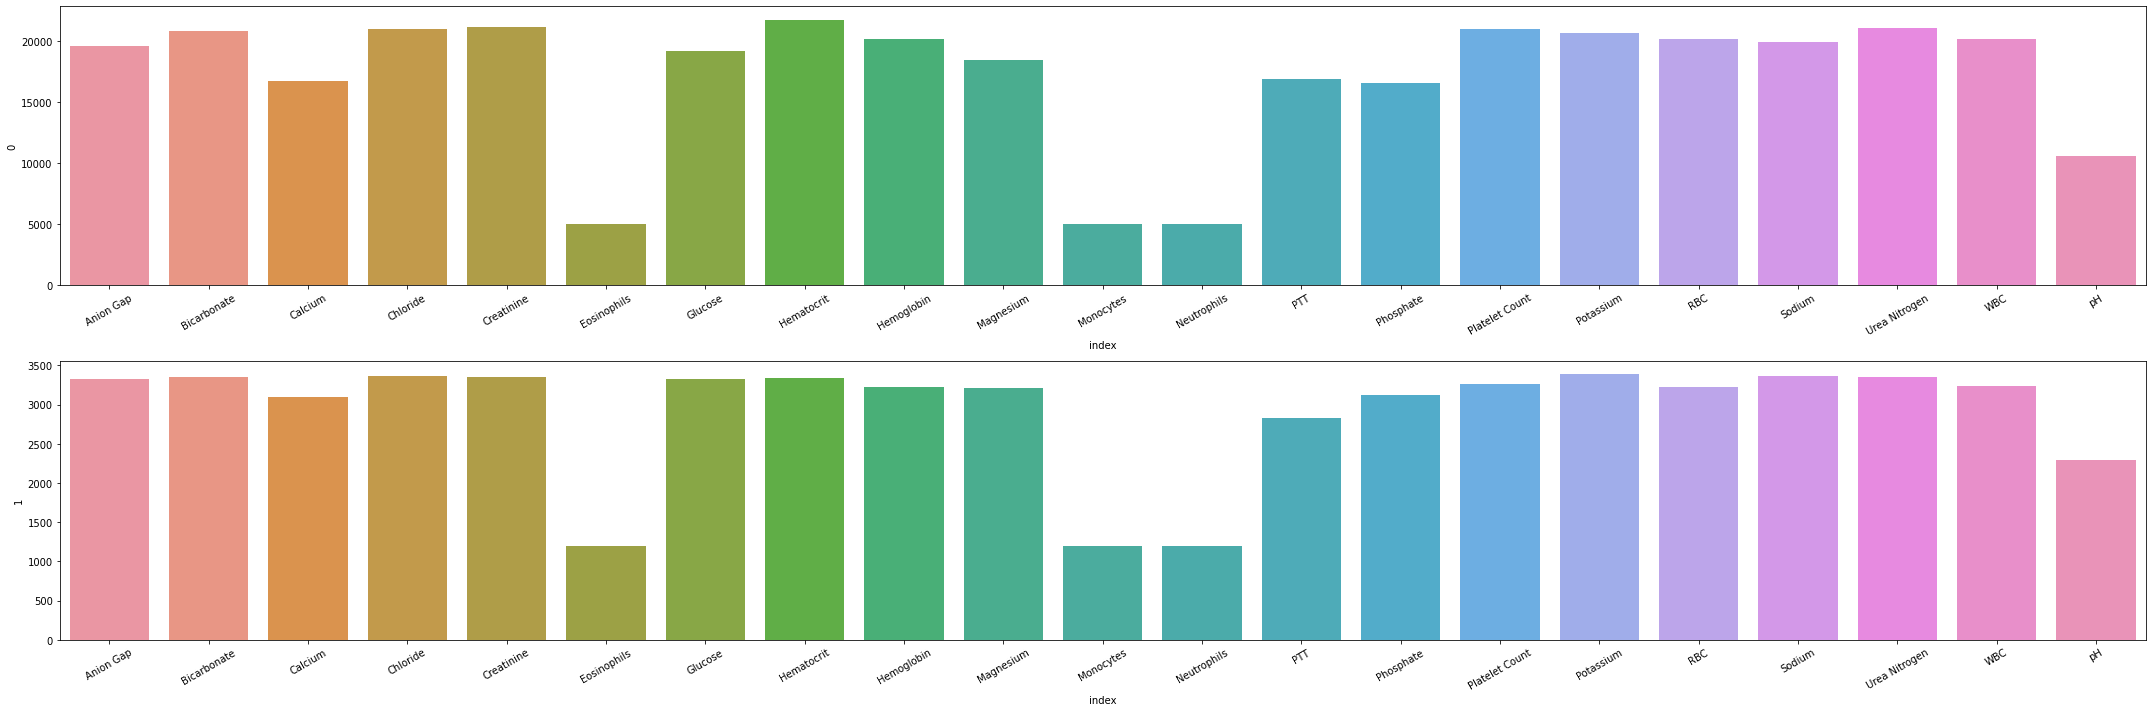

In [ ]:
fig,axes=plt.subplots(nrows=2,figsize=(30,10))

plt.sca(axes[0])
plt.xticks(rotation=30)
axes[0].set(ylabel=0)
sns.barplot(data=dead_item,x="index",y=0, ax=axes[0])


plt.sca(axes[1])
plt.xticks(rotation=30)
axes[1].set(ylabel=1)
sns.barplot(data=dead_item,x="index",y=1, ax=axes[1])
plt.tight_layout()

In [ ]:
dead_item=item.pivot_table(columns="dead",aggfunc="count")

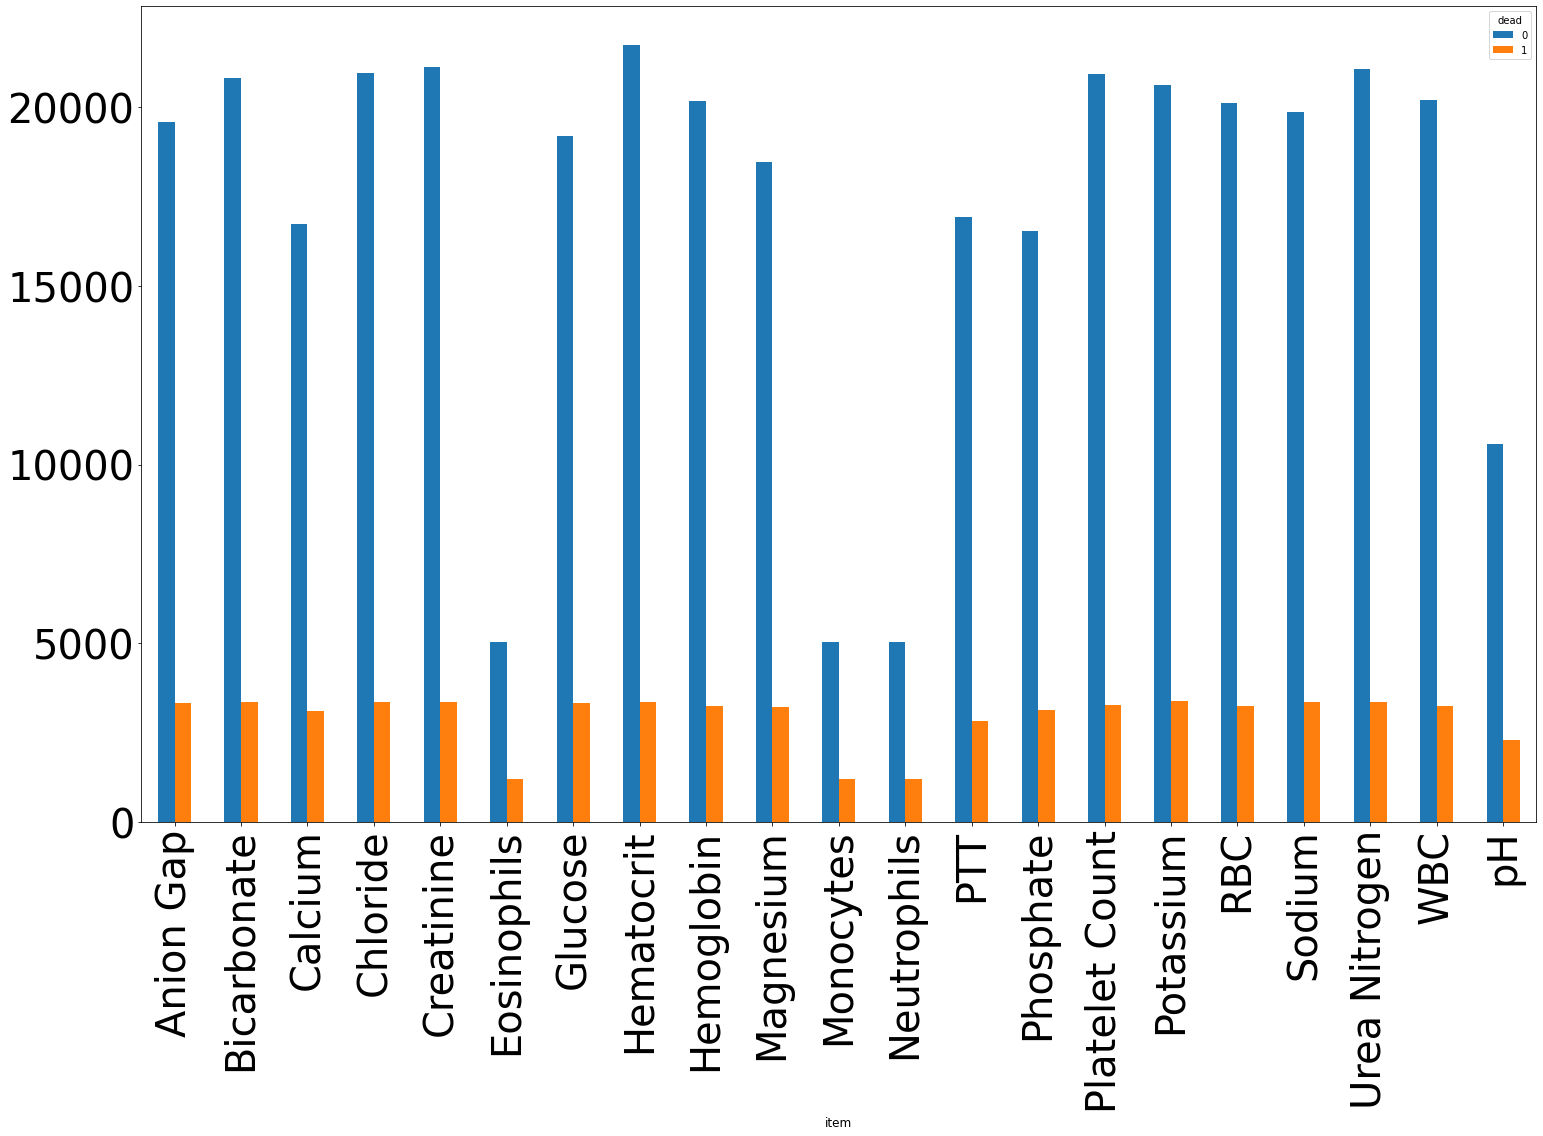

In [ ]:
dead_item.plot.bar(rot=90,figsize=(25,15),fontsize=25)
plt.xlabel("item",fontsize=12)
plt.savefig('dead_items.png')

# 입원 당시 상황에 따른 사망 자수

In [ ]:
df_pivot=df2.pivot_table(index="ADMISSION_TYPE",columns="HOSPITAL_EXPIRE_FLAG",values='SUBJECT_ID',aggfunc="count")
df_pivot

HOSPITAL_EXPIRE_FLAG      0     1
ADMISSION_TYPE                   
ELECTIVE               4485   133
EMERGENCY             18879  3444
URGENT                  643   105

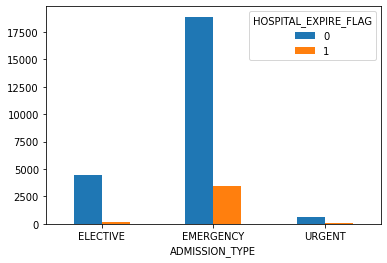

In [ ]:
df_pivot.plot.bar(rot=0)

plt.savefig('RELIGION')

In [ ]:
data1=pd.read_csv(path+"pivot12_mnmx.csv")
ds=pd.read_csv(path+"0414_dummy(최종).csv")
df=pd.read_csv(path+"pivot12.csv")

In [ ]:
data=data1.merge(ds,how="inner",on="SUBJECT_ID")
data

SUBJECT_ID  50820_min  50868_min  ...  ETH_WHITE  GEN_F  GEN_M
0               3       7.26       19.0  ...          1      0      1
1               4        NaN       15.0  ...          1      1      0
2               6       7.25       23.0  ...          1      1      0
3               9       7.39        NaN  ...          0      0      1
4              11        NaN       14.0  ...          1      1      0
...           ...        ...        ...  ...        ...    ...    ...
27684       99983        NaN       11.0  ...          0      0      1
27685       99991        NaN        NaN  ...          1      0      1
27686       99992        NaN       15.0  ...          1      1      0
27687       99995       7.37        8.0  ...          1      1      0
27688       99999       7.36        NaN  ...          0      1      0

[27689 rows x 108 columns]

In [ ]:
data.drop(columns=['50820_min', '50868_min', '50882_min', '50893_min', '50902_min',
       '50912_min', '50931_min', '50960_min', '50970_min', '50971_min',
       '50983_min', '51006_min', '51200_min', '51221_min', '51222_min',
       '51254_min', '51256_min', '51265_min', '51275_min', '51279_min',
       '51301_min', '50820_max', '50868_max', '50882_max', '50893_max',
       '50902_max', '50912_max', '50931_max', '50960_max', '50970_max',
       '50971_max', '50983_max', '51006_max', '51200_max', '51221_max',
       '51222_max', '51254_max', '51256_max', '51265_max', '51275_max',
       '51279_max', '51301_max'],inplace=True)

In [ ]:
data

SUBJECT_ID  AGE  staytime  ... ETH_WHITE  GEN_F  GEN_M
0               3   76        11  ...         1      0      1
1               4   47         8  ...         1      1      0
2               6   65        17  ...         1      1      0
3               9   41         5  ...         0      0      1
4              11   50        26  ...         1      1      0
...           ...  ...       ...  ...       ...    ...    ...
27684       99983   78         4  ...         0      0      1
27685       99991   47        13  ...         1      0      1
27686       99992   65         3  ...         1      1      0
27687       99995   88         4  ...         1      1      0
27688       99999   64         6  ...         0      1      0

[27689 rows x 66 columns]

# simpleimputer로 item id 결측치 처리

In [ ]:
from sklearn.impute import SimpleImputer
def mean_z(data, target, strategy='mean'):
    content = data.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG',"new_code","AGEG2","AGEG1"],axis=1)

    imputer = SimpleImputer(strategy=strategy)
    imputed = imputer.fit_transform(content)
    df_imputed = pd.DataFrame(imputed, columns=content.columns)
        
    X = df_imputed
    y = data[target]
    return X

In [ ]:
data2=data.merge(df,how="inner",on="SUBJECT_ID")
data2

SUBJECT_ID  AGE  staytime  ...       51275  51279      51301
0               3   76        11  ...   46.966667   2.93  18.266667
1               4   47         8  ...   33.200000   3.42   9.700000
2               6   65        17  ...  139.000000   3.44  10.600000
3               9   41         5  ...         NaN    NaN        NaN
4              11   50        26  ...         NaN   4.45   9.300000
...           ...  ...       ...  ...         ...    ...        ...
27684       99983   78         4  ...   27.000000   4.21   7.500000
27685       99991   47        13  ...         NaN    NaN        NaN
27686       99992   65         3  ...         NaN   3.43  17.100000
27687       99995   88         4  ...   31.700000   2.86   8.200000
27688       99999   64         6  ...         NaN    NaN        NaN

[27689 rows x 87 columns]

In [ ]:
res=mean_z(data2, ['50820', '50868', '50882', '50893', '50902', '50912',
       '50931', '50960', '50970', '50971', '50983', '51006', '51200', '51221',
       '51222', '51254', '51256', '51265', '51275', '51279', '51301'], strategy='mean')

In [ ]:
res

AGE  staytime  blood  ...       51275     51279      51301
0      76.0      11.0    0.0  ...   46.966667  2.930000  18.266667
1      47.0       8.0    0.0  ...   33.200000  3.420000   9.700000
2      65.0      17.0    1.0  ...  139.000000  3.440000  10.600000
3      41.0       5.0    0.0  ...   38.228742  3.758767  11.755620
4      50.0      26.0    0.0  ...   38.228742  4.450000   9.300000
...     ...       ...    ...  ...         ...       ...        ...
27684  78.0       4.0    0.0  ...   27.000000  4.210000   7.500000
27685  47.0      13.0    0.0  ...   38.228742  3.758767  11.755620
27686  65.0       3.0    1.0  ...   38.228742  3.430000  17.100000
27687  88.0       4.0    1.0  ...   31.700000  2.860000   8.200000
27688  64.0       6.0    0.0  ...   38.228742  3.758767  11.755620

[27689 rows x 82 columns]

In [ ]:
item=res[['50820', '50868', '50882', '50893', '50902', '50912',
       '50931', '50960', '50970', '50971', '50983', '51006', '51200', '51221',
       '51222', '51254', '51256', '51265', '51275', '51279', '51301']]

In [ ]:
item.rename(columns={'50820':"pH", '50868':'Anion Gap', '50882':'Bicarbonate', '50893':'Calcium', '50902':'Chloride', '50912':'Creatinine',
       '50931':'Glucose', '50960':'Magnesium', '50970':'Phosphate', '50971':'Potassium', '50983':'Sodium', '51006':'Urea Nitrogen', '51200':'Eosinophils', '51221':'Hematocrit',
       '51222':'Hemoglobin', '51254':'Monocytes', '51256':'Neutrophils', '51265':'Platelet Count', '51275':'PTT', '51279':'RBC', '51301':'WBC'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
item

pH  Anion Gap  Bicarbonate  ...         PTT       RBC        WBC
0      7.340000  21.333333    12.333333  ...   46.966667  2.930000  18.266667
1      7.366500  15.000000    21.000000  ...   33.200000  3.420000   9.700000
2      7.342000  23.000000    15.000000  ...  139.000000  3.440000  10.600000
3      7.410000  14.225925    23.833254  ...   38.228742  3.758767  11.755620
4      7.366500  14.000000    25.000000  ...   38.228742  4.450000   9.300000
...         ...        ...          ...  ...         ...       ...        ...
27684  7.366500  11.500000    27.500000  ...   27.000000  4.210000   7.500000
27685  7.366500  14.225925    23.833254  ...   38.228742  3.758767  11.755620
27686  7.366500  15.000000    22.000000  ...   38.228742  3.430000  17.100000
27687  7.471667   8.000000    34.000000  ...   31.700000  2.860000   8.200000
27688  7.375000  14.225925    23.833254  ...   38.228742  3.758767  11.755620

[27689 rows x 21 columns]

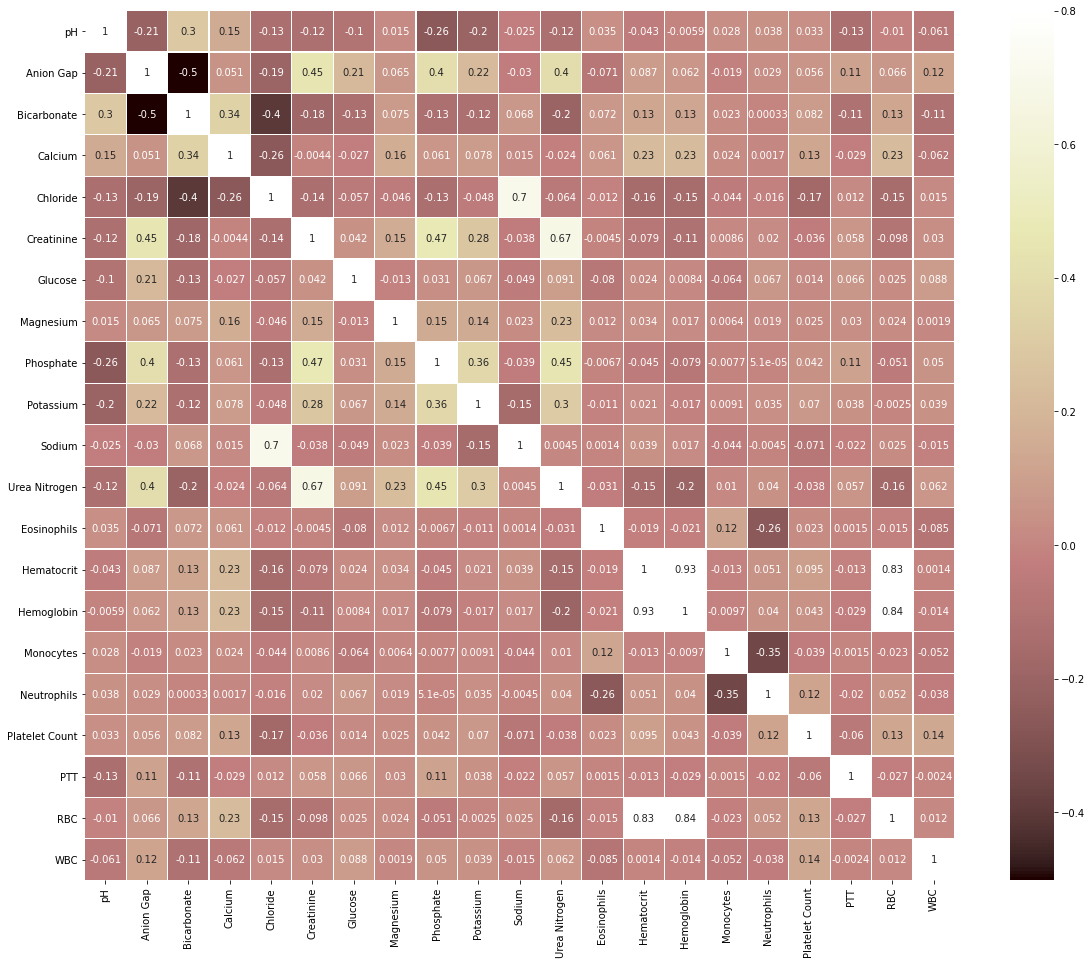

In [ ]:
#item ID간 상관계수 시각화
plt.subplots(figsize=(20,16))
sns.heatmap(item.corr(), linecolor="white",linewidths=0.2,square=True, #사각형 모양을 정사각형으로 출력
            annot=True,cmap=plt.cm.pink, vmax=0.8,annot_kws={"size":10})#annot_kws={"size":10} 칸 안에 글자 크기 10으로 설정
plt.savefig('item_corr.png')

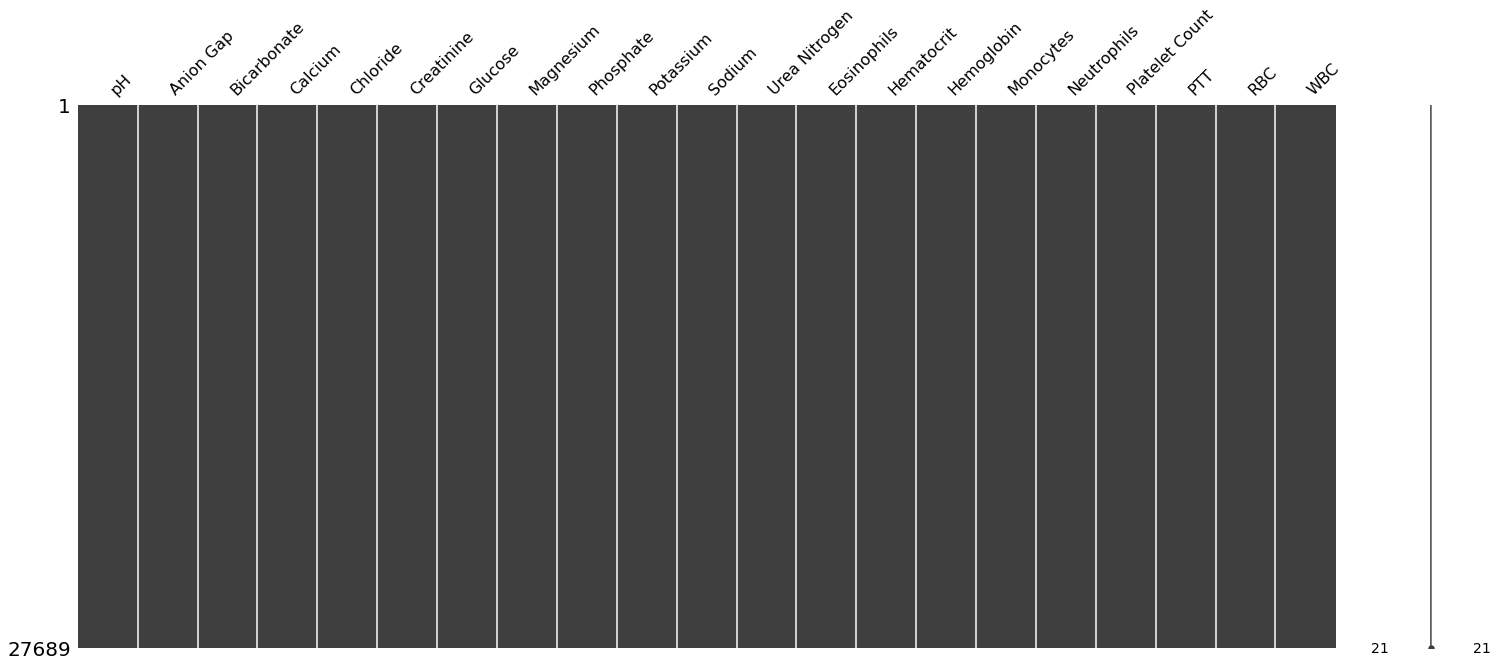

In [ ]:

import missingno as msno
%matplotlib inline
msno.matrix(item)
plt.savefig('clear.png')